In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil
import time



In [184]:
ts = time.time()

data = pd.read_csv('input/drug_purchases.csv', parse_dates=['purchase_date'])

# Convert date from string to date times
data[['purchase_month']] = data['purchase_date'].apply(lambda x: pd.Series(x.strftime("%Y-%m")))
data[['purchase_year']] = data['purchase_date'].apply(lambda x: pd.Series(x.strftime("%Y")))

ts_2 = time.time()

display(ts_2 - ts)

# display(data.dtypes);
data.head()

93.84801483154297

,id,log_id,layout_id,staging_record_id,created_by,created_at,modified_by,modified_at,deleted,address,...,unit_price,drug_name,drug_class,state,drug_indication,person_code,pharmacy,zip,purchase_month,purchase_year
0,410,46,87,595,SYSTEM,2018-10-08 21:30:06,SYSTEM,2018-10-08 21:30:06,False,5208 98TH ST,...,0.1327,PANTOPRAZOLE TAB 40MG,ULCER DRUGS,TX,Ulcer,17546398,CVS PHARMACY,79424,2016-01,2016
1,2387,46,87,2612,SYSTEM,2018-10-08 21:30:27,SYSTEM,2018-10-08 21:30:27,False,251 N BROADWAY,...,0.2450,PREDNISONE TAB 10MG,CORTICOSTEROIDS,NJ,Inflammation,17427509,SAVON PHARMACY,8070,2016-01,2016
2,2411,46,87,2587,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,2040 ROUTE 130,...,0.2734,ATORVASTATIN TAB 10MG,ANTIHYPERLIPIDEMICS,NJ,High Cholesterol,17112961,EXPRESS SCRIPTS,80169716,2016-01,2016
3,2436,46,87,2565,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,5230 DALLAS HWY,...,304.5100,TUDORZA PRES AER 400/ACT,ANTIASTHMATIC AND BRONCHODILATOR AGENTS,GA,Asthma,17427513,WALGREENS #6325,30127,2016-01,2016
4,2461,46,87,2540,SYSTEM,2018-10-08 21:30:28,SYSTEM,2018-10-08 21:30:28,False,1704 W HILLSBOROUGH,...,0.1813,PANTOPRAZOLE TAB 40MG,ULCER DRUGS,FL,Ulcer,17106797,WALGREENS #6611,33603,2016-01,2016


In [185]:
from fbprophet import Prophet

m_df = data[['purchase_month', 'unit_price']]

mod_data = m_df.copy();
m_df_sum = pd.DataFrame({'unit_price' : mod_data.groupby(["purchase_month"])['unit_price'].sum()}).reset_index()

m_df_count = pd.DataFrame({'unit_price' : mod_data.groupby(["purchase_month"])['unit_price'].count()}).reset_index()


In [186]:
m_df1_sum = m_df_sum.copy()
m_df1_sum.rename(columns={'purchase_month': 'ds',
                   'unit_price': 'y'},
          inplace=True)

m_df1_sum.head()

,ds,y
0,2016-01,61704.4785
1,2016-02,71601.1962
2,2016-03,78170.8829
3,2016-04,103794.4647
4,2016-05,105521.8570


In [187]:
m_df1_count = m_df_count.copy()
m_df1_count.rename(columns={'purchase_month': 'ds',
                   'unit_price': 'y'},
          inplace=True)

m_df1_count.head()

,ds,y
0,2016-01,4500
1,2016-02,4641
2,2016-03,5133
3,2016-04,4678
4,2016-05,4800


In [192]:
m = Prophet(weekly_seasonality=False, daily_seasonality=False)
m.fit(m_df1_sum)
m_forecast = m.make_future_dataframe(periods=365, freq='D')
m_forecast = m.predict(m_forecast)

display(m_forecast.head())
display(m_forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,76341.383731,44134.759893,87266.974917,76341.383731,76341.383731,-11126.972294,-11126.972294,-11126.972294,-11126.972294,-11126.972294,-11126.972294,0.0,0.0,0.0,65214.411437
1,2016-02-01,77559.801449,42693.691546,89242.318987,77559.801449,77559.801449,-11108.883463,-11108.883463,-11108.883463,-11108.883463,-11108.883463,-11108.883463,0.0,0.0,0.0,66450.917986
2,2016-03-01,78699.611546,64776.492552,108409.678810,78699.611546,78699.611546,7561.680325,7561.680325,7561.680325,7561.680325,7561.680325,7561.680325,0.0,0.0,0.0,86261.291871
3,2016-04-01,79918.029287,65084.751356,110538.106931,79918.029287,79918.029287,9319.298215,9319.298215,9319.298215,9319.298215,9319.298215,9319.298215,0.0,0.0,0.0,89237.327502
4,2016-05-01,81097.143236,70736.612791,118682.582719,81097.143236,81097.143236,13911.850279,13911.850279,13911.850279,13911.850279,13911.850279,13911.850279,0.0,0.0,0.0,95008.993516


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
393,2019-08-28,128812.179510,104344.454741,149026.975413,128812.162782,128812.194960,-2455.047990,-2455.047990,-2455.047990,-2455.047990,-2455.047990,-2455.047990,0.0,0.0,0.0,126357.131520
394,2019-08-29,128851.483619,104169.681308,150230.269152,128851.466790,128851.499148,-2753.101397,-2753.101397,-2753.101397,-2753.101397,-2753.101397,-2753.101397,0.0,0.0,0.0,126098.382222
395,2019-08-30,128890.787728,103476.595296,148261.154046,128890.770810,128890.803335,-3013.362119,-3013.362119,-3013.362119,-3013.362119,-3013.362119,-3013.362119,0.0,0.0,0.0,125877.425610
396,2019-08-31,128930.091837,102537.340038,148427.336433,128930.074832,128930.107523,-3235.231507,-3235.231507,-3235.231507,-3235.231507,-3235.231507,-3235.231507,0.0,0.0,0.0,125694.860330
397,2019-09-01,128969.395947,103899.673305,147636.300283,128969.378879,128969.411722,-3416.862429,-3416.862429,-3416.862429,-3416.862429,-3416.862429,-3416.862429,0.0,0.0,0.0,125552.533517


In [193]:
m_count = Prophet(weekly_seasonality=False, daily_seasonality=False)
m_count.fit(m_df1_count)
m_count_forecast = m_count.make_future_dataframe(periods=365, freq='D')
m_count_forecast = m_count.predict(m_count_forecast)

display(m_count_forecast.head())
display(m_count_forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,3969.836274,3860.245416,5419.836953,3969.836274,3969.836274,690.983038,690.983038,690.983038,690.983038,690.983038,690.983038,0.0,0.0,0.0,4660.819312
1,2016-02-01,4061.446493,3497.959550,5198.322968,4061.446493,4061.446493,303.386443,303.386443,303.386443,303.386443,303.386443,303.386443,0.0,0.0,0.0,4364.832936
2,2016-03-01,4147.146375,4124.163901,5855.491176,4147.146375,4147.146375,772.880882,772.880882,772.880882,772.880882,772.880882,772.880882,0.0,0.0,0.0,4920.027256
3,2016-04-01,4238.756594,3617.528342,5317.255546,4238.756594,4238.756594,228.296530,228.296530,228.296530,228.296530,228.296530,228.296530,0.0,0.0,0.0,4467.053123
4,2016-05-01,4327.411644,3851.565752,5516.454664,4327.411644,4327.411644,323.278324,323.278324,323.278324,323.278324,323.278324,323.278324,0.0,0.0,0.0,4650.689968


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
393,2019-08-28,8735.577352,6253.259935,7968.465200,8691.241680,8774.779267,-1632.469336,-1632.469336,-1632.469336,-1632.469336,-1632.469336,-1632.469336,0.0,0.0,0.0,7103.108016
394,2019-08-29,8739.486561,6361.136367,8140.386188,8695.120350,8778.797393,-1508.423482,-1508.423482,-1508.423482,-1508.423482,-1508.423482,-1508.423482,0.0,0.0,0.0,7231.063079
395,2019-08-30,8743.395770,6492.021358,8189.299217,8698.847802,8782.815519,-1373.199590,-1373.199590,-1373.199590,-1373.199590,-1373.199590,-1373.199590,0.0,0.0,0.0,7370.196180
396,2019-08-31,8747.304979,6660.771560,8407.071399,8702.548722,8786.833645,-1229.267012,-1229.267012,-1229.267012,-1229.267012,-1229.267012,-1229.267012,0.0,0.0,0.0,7518.037966
397,2019-09-01,8751.214187,6741.598685,8514.132340,8706.249642,8790.853893,-1079.221483,-1079.221483,-1079.221483,-1079.221483,-1079.221483,-1079.221483,0.0,0.0,0.0,7671.992705


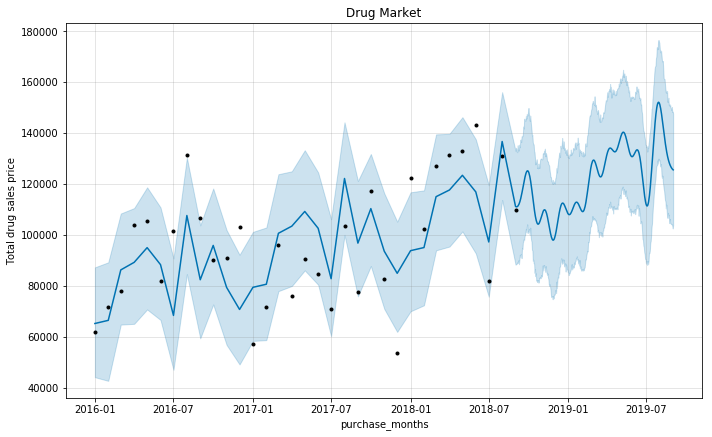

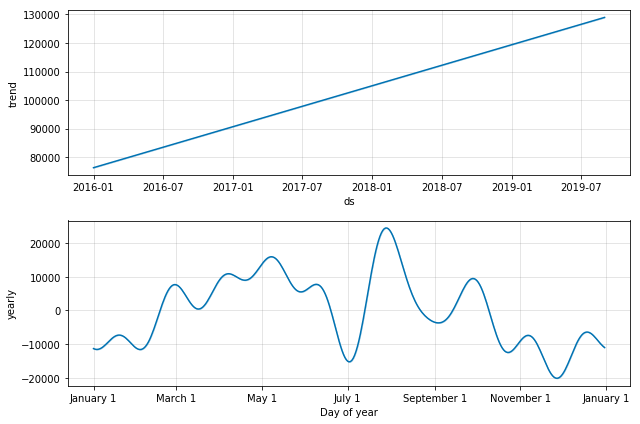

In [194]:
fig = m.plot(m_forecast, xlabel='purchase_months', ylabel='Total drug sales price')
plt.title('Drug Market')
plt.show()

m.plot_components(m_forecast)
plt.show()

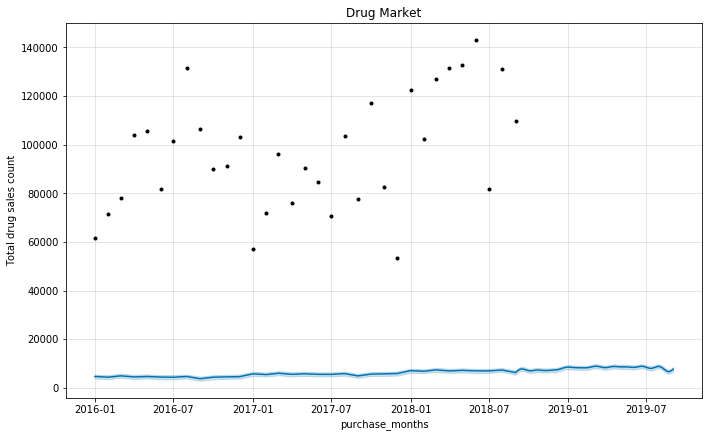

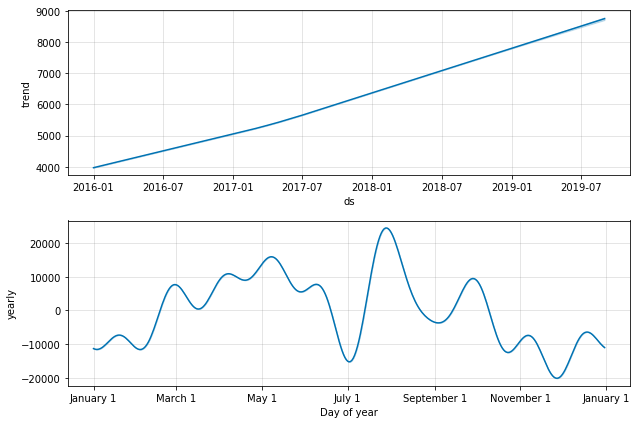

In [195]:
fig = m.plot(m_count_forecast, xlabel='purchase_months', ylabel='Total drug sales count')
plt.title('Drug Market')
plt.show()

m.plot_components(m_count_forecast)
plt.show()

In [196]:
# How many rows the dataset
data['id'].count()

184250

In [109]:
# What was the highest unit_price?
data['unit_price'].max()

32032.06

In [110]:
# How many entries are there for each month?
data['drug_indication'].value_counts();

In [111]:
data['drug_class'].value_counts();

In [112]:
data['person_code'].value_counts();

In [113]:
data['pharmacy'].value_counts();

In [114]:
data['state'].value_counts();

In [115]:
data.groupby(['person_code', 'pharmacy'])['id'].count();


In [207]:
data.groupby(['state', 'pharmacy'])['purchase_date'].count();

In [117]:
data['purchase_date'].value_counts();

In [118]:
data['purchase_month'].value_counts();

In [119]:
data.groupby(['drug_class', 'purchase_month'])['id'].count();

In [120]:
data.groupby(['state', 'purchase_month'])['id'].count();

In [121]:
grouped = data.groupby(['state', 'purchase_month'])['id'].count().reset_index(name='count').sort_values(['state','count'], ascending=[True, False]).groupby('state').head(5)
grouped;

In [122]:
data.groupby(['person_code', 'purchase_month'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['person_code','count', 'purchase_month'], ascending=[True, False, False]) \
    .groupby('person_code').head(3);


In [175]:
data.groupby(['person_code', 'purchase_month'])['unit_price'] \
    .sum() \
    .reset_index(name='sum') \
    .sort_values(['person_code','sum', 'purchase_month'], ascending=[True, False, False]) \
    .groupby('person_code').head(3);

In [125]:
data.groupby(['state', 'purchase_month'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['state','count', 'purchase_month'], ascending=[True, False, False]) \
    .groupby('state').head(3);


In [178]:
data.groupby(['state', 'purchase_month'])['unit_price'] \
    .sum() \
    .reset_index(name='sum') \
    .sort_values(['state','sum', 'purchase_month'], ascending=[True, False, False]) \
    .groupby('state').head(3);

In [200]:
data.groupby(['state', 'purchase_year'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['state','count', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('state').head(3);


In [201]:
data.groupby(['state', 'purchase_year'])['unit_price'] \
    .sum() \
    .reset_index(name='sum') \
    .sort_values(['state','sum', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('state').head(3);

In [203]:
data.groupby(['person_code', 'purchase_year'])['id'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['person_code','count', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('person_code').head(3);


In [204]:
data.groupby(['person_code', 'purchase_year'])['unit_price'] \
    .sum() \
    .reset_index(name='sum') \
    .sort_values(['person_code','sum', 'purchase_year'], ascending=[True, False, False]) \
    .groupby('person_code').head(3)


,person_code,purchase_year,sum
2,13132450,2018,42.8696
1,13132450,2017,31.6435
0,13132450,2016,22.2497
3,13133262,2016,17.5801
4,13133262,2017,2.6151
5,13133575,2016,5888.4402
6,13133575,2017,1257.6263
7,13133736,2016,30.9008
8,13133736,2017,7.4458
10,13133739,2017,95.9319
